In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as tfk
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

Using TensorFlow backend.


In [2]:
img_height = 256
img_width = 256
channels = 3
batch_size = 8
epochs = 20

In [22]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
    './dataset/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training',
    shuffle=True)
val_set = train_datagen.flow_from_directory(
    './dataset/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation',
    shuffle=True)



Found 800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [23]:
num_class = train_set.num_classes
labels = train_set.class_indices.keys()
print(labels)

dict_keys(['COVID-19', 'NORMAL', 'PNEUMONIA', 'TBC'])


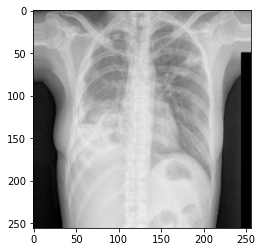

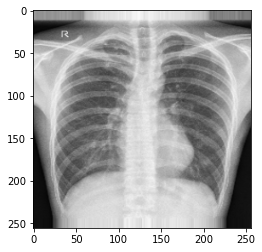

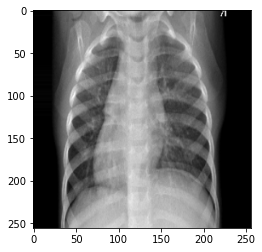

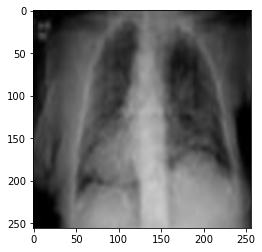

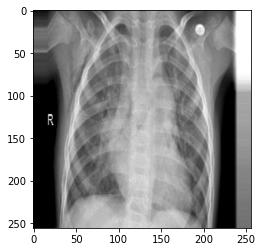

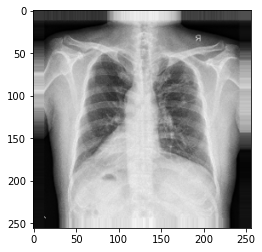

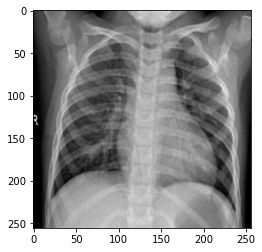

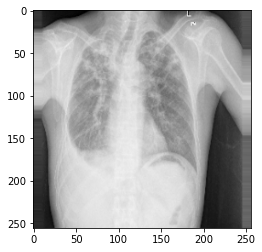

In [25]:
x,y = val_set.next()
for i in range(8):
    image = x[i]
    plt.imshow(image)
    plt.show()

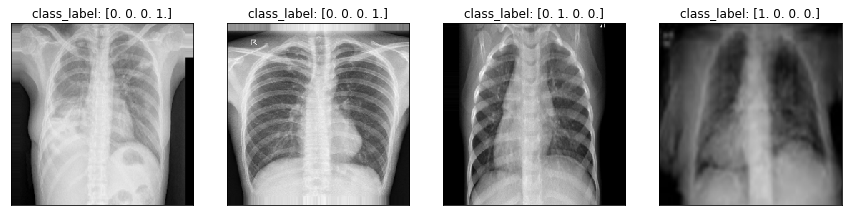

In [26]:
fig = plt.figure(1,figsize=(12,12))
for i in range(4):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  x[i] = x[i][:,:,::-1]
  plt.imshow(x[i], interpolation='none')
  plt.title("class_label: {}".format(y[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from tensorflow.keras.layers import AveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, Input, GlobalAveragePooling2D
model = InceptionV3(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, channels), classes=num_class)

for layer in model.layers[:-5]:
    layer.trainable = False

x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=model.inputs, outputs=predictions)

In [10]:
model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4, decay=1e-6),
                  metrics=['accuracy'])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 25 steps
Epoch 1/20
100/100 [==============================] - 83s 828ms/step - loss: 0.6577 - accuracy: 0.7462 - val_loss: 1.7009 - val_accuracy: 0.3900
Epoch 2/20
100/100 [==============================] - 78s 784ms/step - loss: 0.4450 - accuracy: 0.8363 - val_loss: 1.4686 - val_accuracy: 0.3700
Epoch 3/20
100/100 [==============================] - 81s 809ms/step - loss: 0.3757 - accuracy: 0.8687 - val_loss: 2.3511 - val_accuracy: 0.3550
Epoch 4/20
100/100 [==============================] - 79s 794ms/step - loss: 0.3527 - accuracy: 0.8788 - val_loss: 3.6210 - val_accuracy: 0.3050
Epoch 5/20
100/100 [==============================] - 80s 795ms/step - loss: 0.3076 - accuracy: 0.8988 - val_loss: 2.3450 - val_accuracy: 0.4450
Epoch 6/20
100/100 [==============================] - 79s 790ms/step - loss: 0.3263 - accuracy: 0.8925 - v

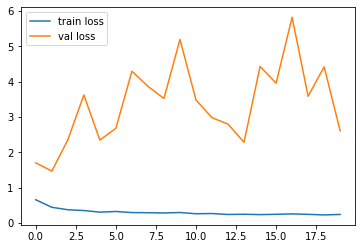

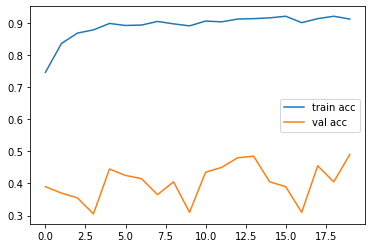

<Figure size 432x288 with 0 Axes>

In [11]:
history_tl = model.fit_generator(train_set,
                                 steps_per_epoch=train_set.n // batch_size,
                                 epochs=20,
                                 validation_data=val_set,
                                 validation_steps=val_set.n // batch_size)
plt.plot(history_tl.history['loss'], label='train loss')
plt.plot(history_tl.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('loss_inceptionv3epoch5')
# plot the accuracy
plt.plot(history_tl.history['accuracy'], label='train acc')
plt.plot(history_tl.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('acc_inceptionv3epoch5')
model.save('INCEPTIONV3.h5')


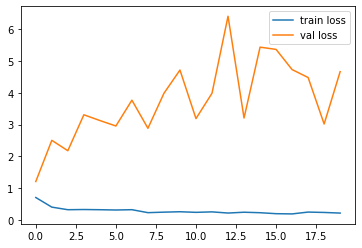

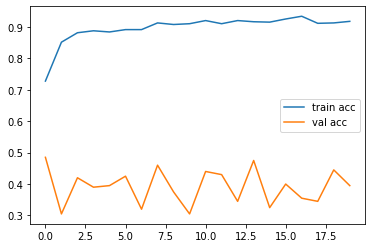

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(history_tl.history['loss'], label='train loss')
plt.plot(history_tl.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('loss_inceptionv3epoch5')
# plot the accuracy
plt.plot(history_tl.history['accuracy'], label='train acc')
plt.plot(history_tl.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('acc_inceptionv3epoch5')
model.save('INCEPTIONV3epoch5.h5')